In [1]:
import pygyre as pg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = pg.read_output('summary.h5')

In [3]:
s

E_norm,M_star,R_star,freq,l,n_pg,omega
float64,float64,float64,complex128,int32,int32,complex128
0.002259434512286677,9.942049353490252e+33,259093492297.42535,(1.4333505840628302+0j),2,-14,(0.5336573456232026+0j)
0.0018744012367247983,9.942049353490252e+33,259093492297.42535,(1.4877794554088801+0j),2,-13,(0.5539220089447662+0j)
0.0024557014883078254,9.942049353490252e+33,259093492297.42535,(1.6229254994458122+0j),2,-12,(0.6042388539191456+0j)
0.005613953310220123,9.942049353490252e+33,259093492297.42535,(1.8023165230419447+0j),2,-11,(0.6710287506446105+0j)
0.029181604268384016,9.942049353490252e+33,259093492297.42535,(1.936848311084696+0j),2,-10,(0.7211168991458226+0j)
0.014379922580194876,9.942049353490252e+33,259093492297.42535,(2.0861551529039457+0j),2,-9,(0.7767060158452381+0j)
0.026189306107689384,9.942049353490252e+33,259093492297.42535,(2.4067340553463574+0j),2,-8,(0.8960622208396178+0j)
0.06732724404829314,9.942049353490252e+33,259093492297.42535,(2.7992917629575977+0j),2,-7,(1.0422171857009994+0j)
0.09294426422720797,9.942049353490252e+33,259093492297.42535,(3.0224190749594704+0j),2,-6,(1.125290741035554+0j)


In [4]:
d = pg.read_output('detail.l2.n-3.h5')

In [5]:
c0 = 299792458
GNewton = 6.67408*10**(-11)

Rstar=s['R_star'][1] / 100
Mstar = s['M_star'][1] / 1000
M_r = d['M_r'] / 1000

rho_Dles = (d['rho'] * 10**3) * Rstar**2 * GNewton/ c0**2
M_Dles = Mstar * GNewton/ c0**2 / Rstar
Mr_Dles = M_r * GNewton/ c0**2 / Rstar

In [6]:
np.trapz(4.0*(np.pi)*(d['x'])*(rho_Dles)*Mr_Dles,d['x']) / (M_Dles**2)

1.9806338356125062

In [7]:
Rstar / (6.957*10**8)

3.72421291213778

In [8]:
1/((rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))**(1/3)*0.5)

0.3723825931649431

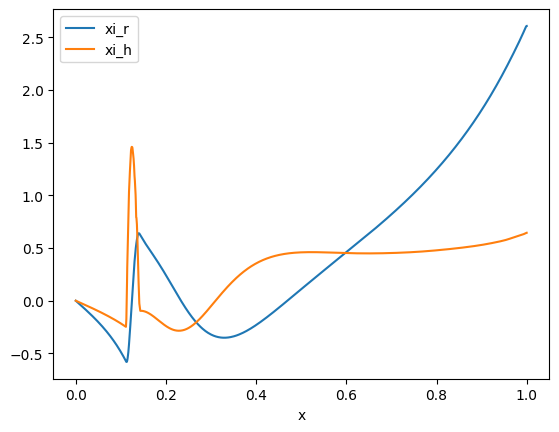

In [9]:

plt.figure()

plt.plot(d['x'], d['xi_r'].real, label='xi_r')
plt.plot(d['x'], d['xi_h'].real, label='xi_h')

plt.xlabel('x')

plt.legend()

/tmp/ipykernel_3505823/2715802805.py:11: RuntimeWarning: divide by zero encountered in divide
  d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)


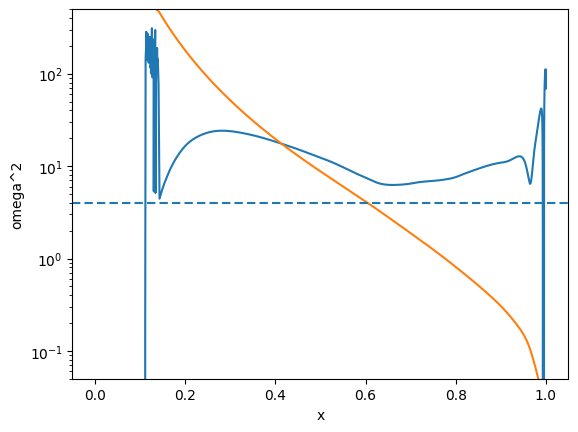

In [10]:
l = d.meta['l']
omega = d.meta['omega']

x = d['x']
V = d['V_2']*d['x']**2
As = d['As']
c_1 = d['c_1']
Gamma_1 = d['Gamma_1']

d['N2'] = d['As']/d['c_1']
d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)

# Plot the propagation diagram

plt.figure()

plt.plot(d['x'], d['N2'], label='N^2')
plt.plot(d['x'], d['Sl2'], label='S_l^2')

plt.axhline(omega.real**2, dashes=(4,2))

plt.xlabel('x')
plt.ylabel('omega^2')

plt.ylim(5e-2, 5e2)
plt.yscale('log')

In [11]:
D_overlap = np.trapz(rho_Dles *( d['x']**3 * d['xi_r'] + 3 * d['x']**2 * (d['x'] * d['xi_h'])),d['x']) / M_Dles

In [12]:
N_overlap= np.trapz(rho_Dles *( d['x']**2 * d['xi_r']**2 + 6 * (d['x'] * d['xi_h'])**2 ),d['x']) / M_Dles

In [13]:
D_overlap **2 / N_overlap

(0.00014421503924266408+0j)